In [2]:
#import packages
import time
import numpy as np
import capytaine as cpt
import scipy
from capytaine.io.mesh_writers import write_STL
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
import logging
import xarray as xr
from capytaine.io.xarray import merge_complex_values
from capytaine.post_pro import rao
logging.basicConfig(level=logging.INFO, format='%(levelname)-8s: %(message)s')
import scienceplots
plt.style.use(['science','no-latex','ieee'])

# # Import custom package
# import DM_Assemble as DM_A
# import DM_Reading  as DM_R
# import DM_ShowNodes as DMshow
# import DM_Verify as DM_V
# import DM_Windload as DM_Wind
# from wave_spectrum import  jonswap

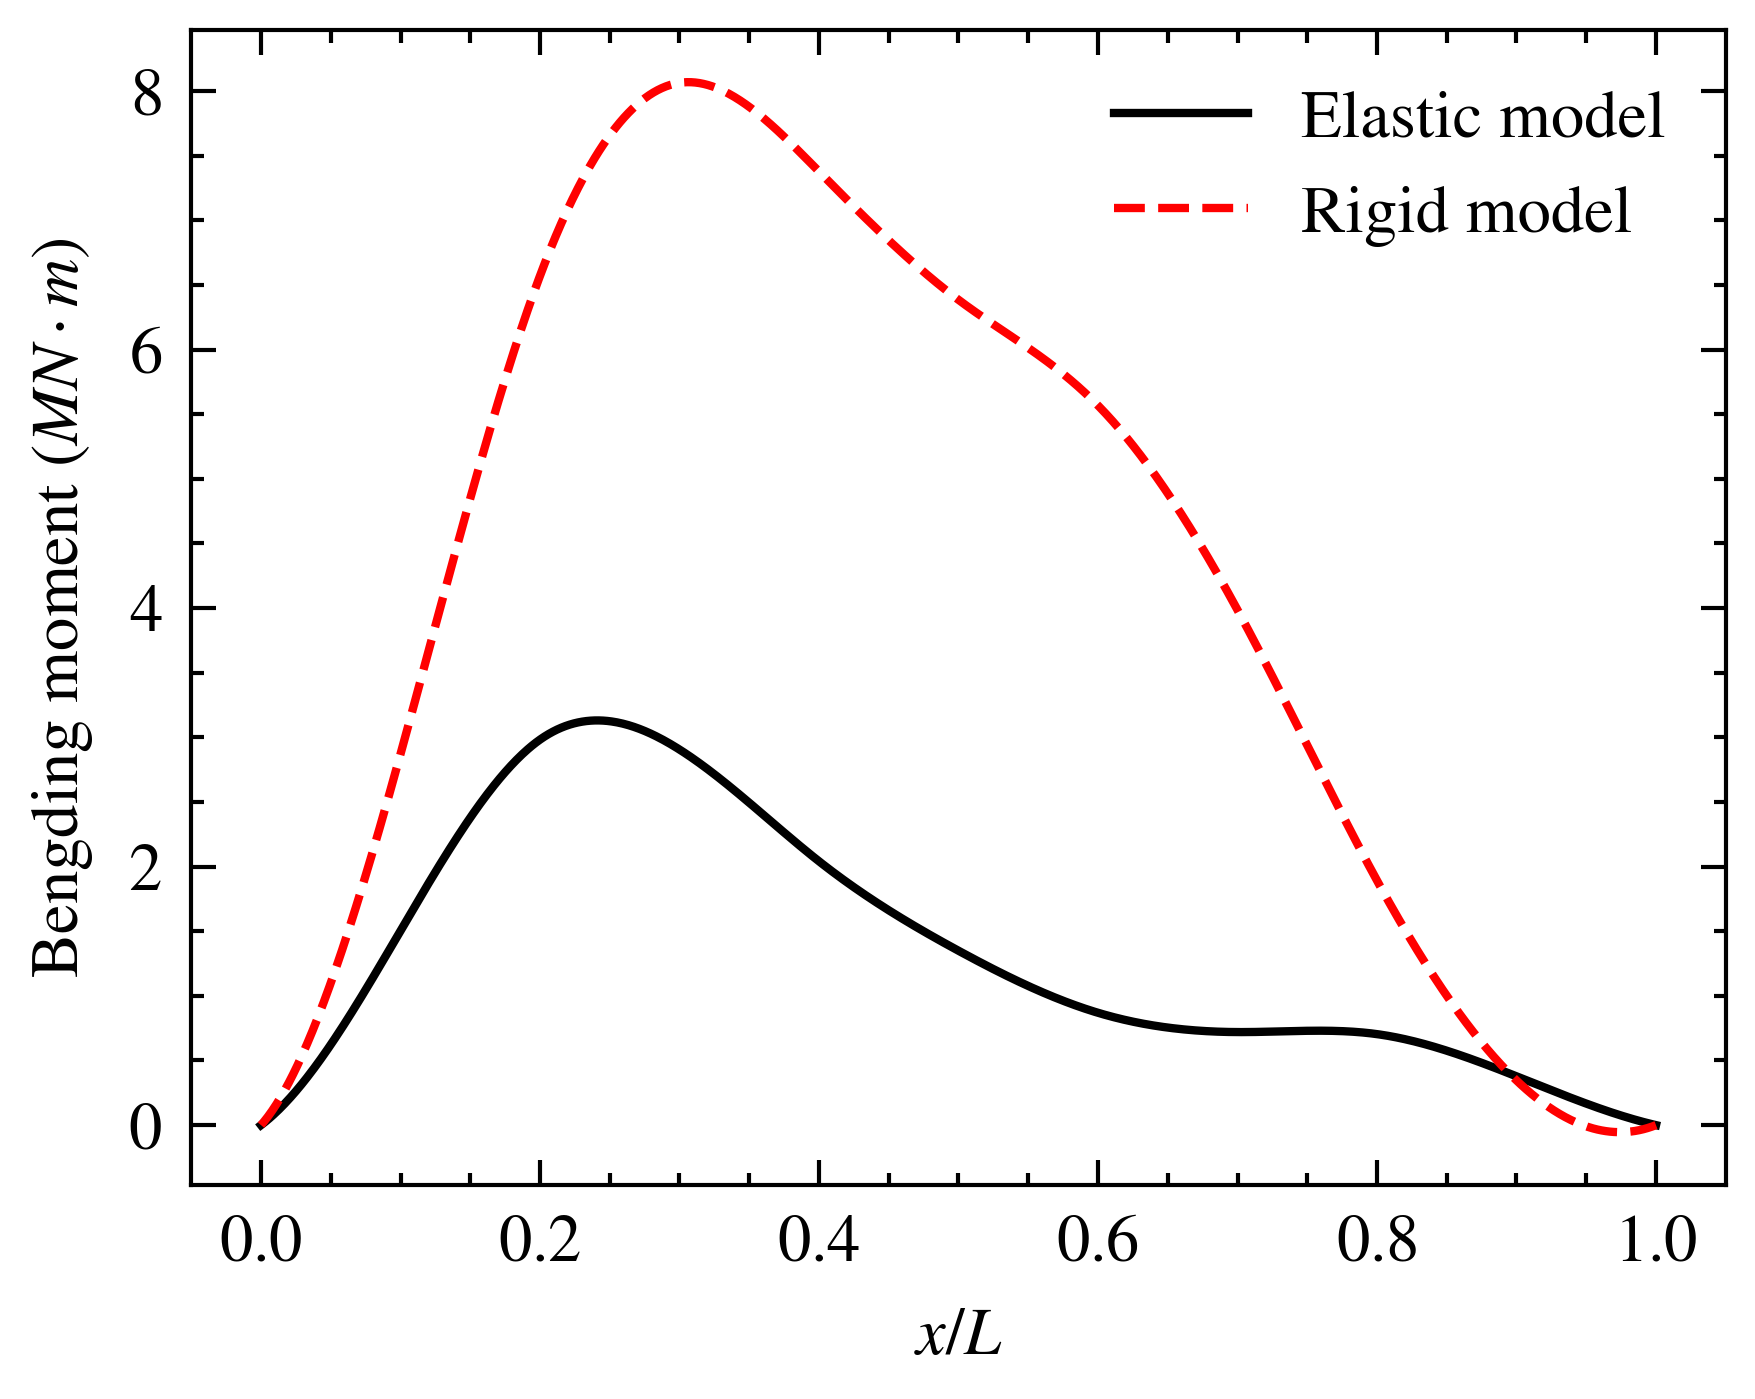

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
plt.style.use(['science','no-latex','ieee'])
# 加载数据
My_yuan = np.load("data\MY_2.35e10.npy")
My_1e20 = np.load("data\M_1E20.npy")

# 创建插值对象
x = np.arange(len(My_yuan))  # 原始x坐标
cs_yuan = CubicSpline(x, My_yuan)
cs_1e20 = CubicSpline(x, My_1e20)

# 生成插值后的x坐标（从0到1，间隔0.001，增加到1000个点）
x_interp = np.linspace(0, 1, 1000)

# 计算插值后的y坐标
y_interp_yuan = cs_yuan(x_interp * (len(My_yuan) - 1))  # 乘以最大x坐标以匹配数据范围
y_interp_1e20 = cs_1e20(x_interp * (len(My_1e20) - 1))

# 绘制插值后的曲线
plt.plot(x_interp, y_interp_yuan[::-1]/1e6, label='Elastic model')
plt.plot(x_interp, y_interp_1e20[::-1]/1e6, label='Rigid model')

# 添加x轴标题和y轴标题
plt.xlabel(r'$x$/$L$')
plt.ylabel(r'Bengding moment ($MN \cdot m$)')

# 添加图例
plt.legend()
plt.savefig('My.pdf', dpi=600, bbox_inches='tight')
# 显示图表
plt.show()


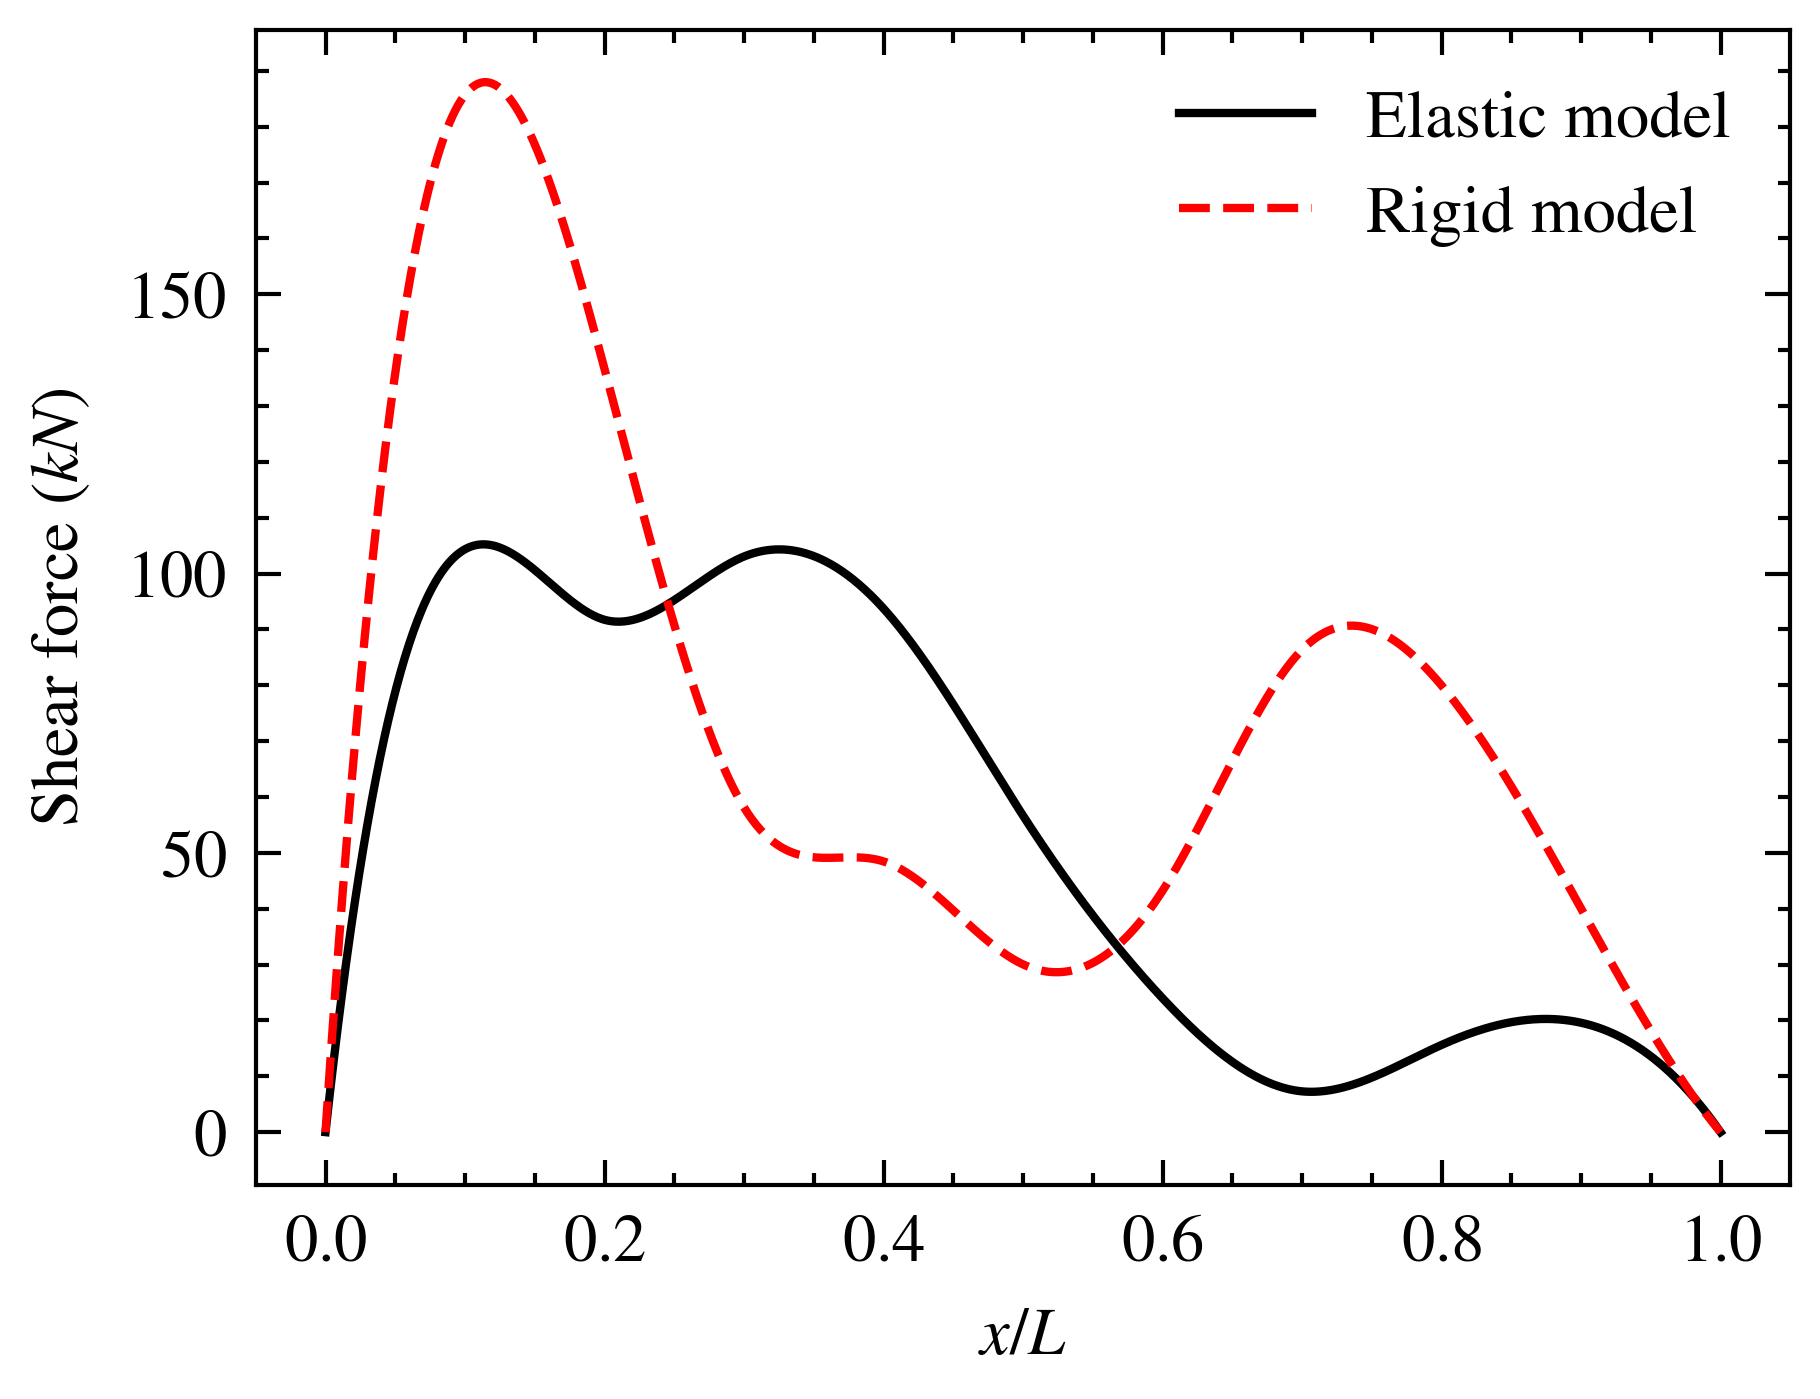

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
plt.style.use(['science','no-latex','ieee'])
# 加载数据
My_yuan = np.load("E:\phd\Code\DM-FEM2D\Rigid_elastic_compare\data\Fz_2.35e10.npy")
My_1e20 = np.load("E:\phd\Code\DM-FEM2D\Rigid_elastic_compare\data\Fz_1E20.npy")

# 创建插值对象
x = np.arange(len(My_yuan))  # 原始x坐标
cs_yuan = CubicSpline(x, My_yuan)
cs_1e20 = CubicSpline(x, My_1e20)

# 生成插值后的x坐标（从0到1，间隔0.001，增加到1000个点）
x_interp = np.linspace(0, 1, 1000)

# 计算插值后的y坐标
y_interp_yuan = cs_yuan(x_interp * (len(My_yuan) - 1))  # 乘以最大x坐标以匹配数据范围
y_interp_1e20 = cs_1e20(x_interp * (len(My_1e20) - 1))

# 绘制插值后的曲线
plt.plot(x_interp, y_interp_yuan[::-1]/1e3, label='Elastic model')
plt.plot(x_interp, y_interp_1e20[::-1]/1e3, label='Rigid model')

# 添加x轴标题和y轴标题
plt.xlabel(r'$x$/$L$')
plt.ylabel(r'Shear force ($kN$)')

# 添加图例
plt.legend()
plt.savefig('FZ.pdf', dpi=600, bbox_inches='tight')
# 显示图表
plt.show()


C:\Users\WYJ\AppData\Local\Temp\ipykernel_21984\3343479027.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{'Row': i, 'Value': last_value} for i in range(len(df) + 1, max_rows + 1)], ignore_index=True)
C:\Users\WYJ\AppData\Local\Temp\ipykernel_21984\3343479027.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{'Row': i, 'Value': last_value} for i in range(len(df) + 1, max_rows + 1)], ignore_index=True)


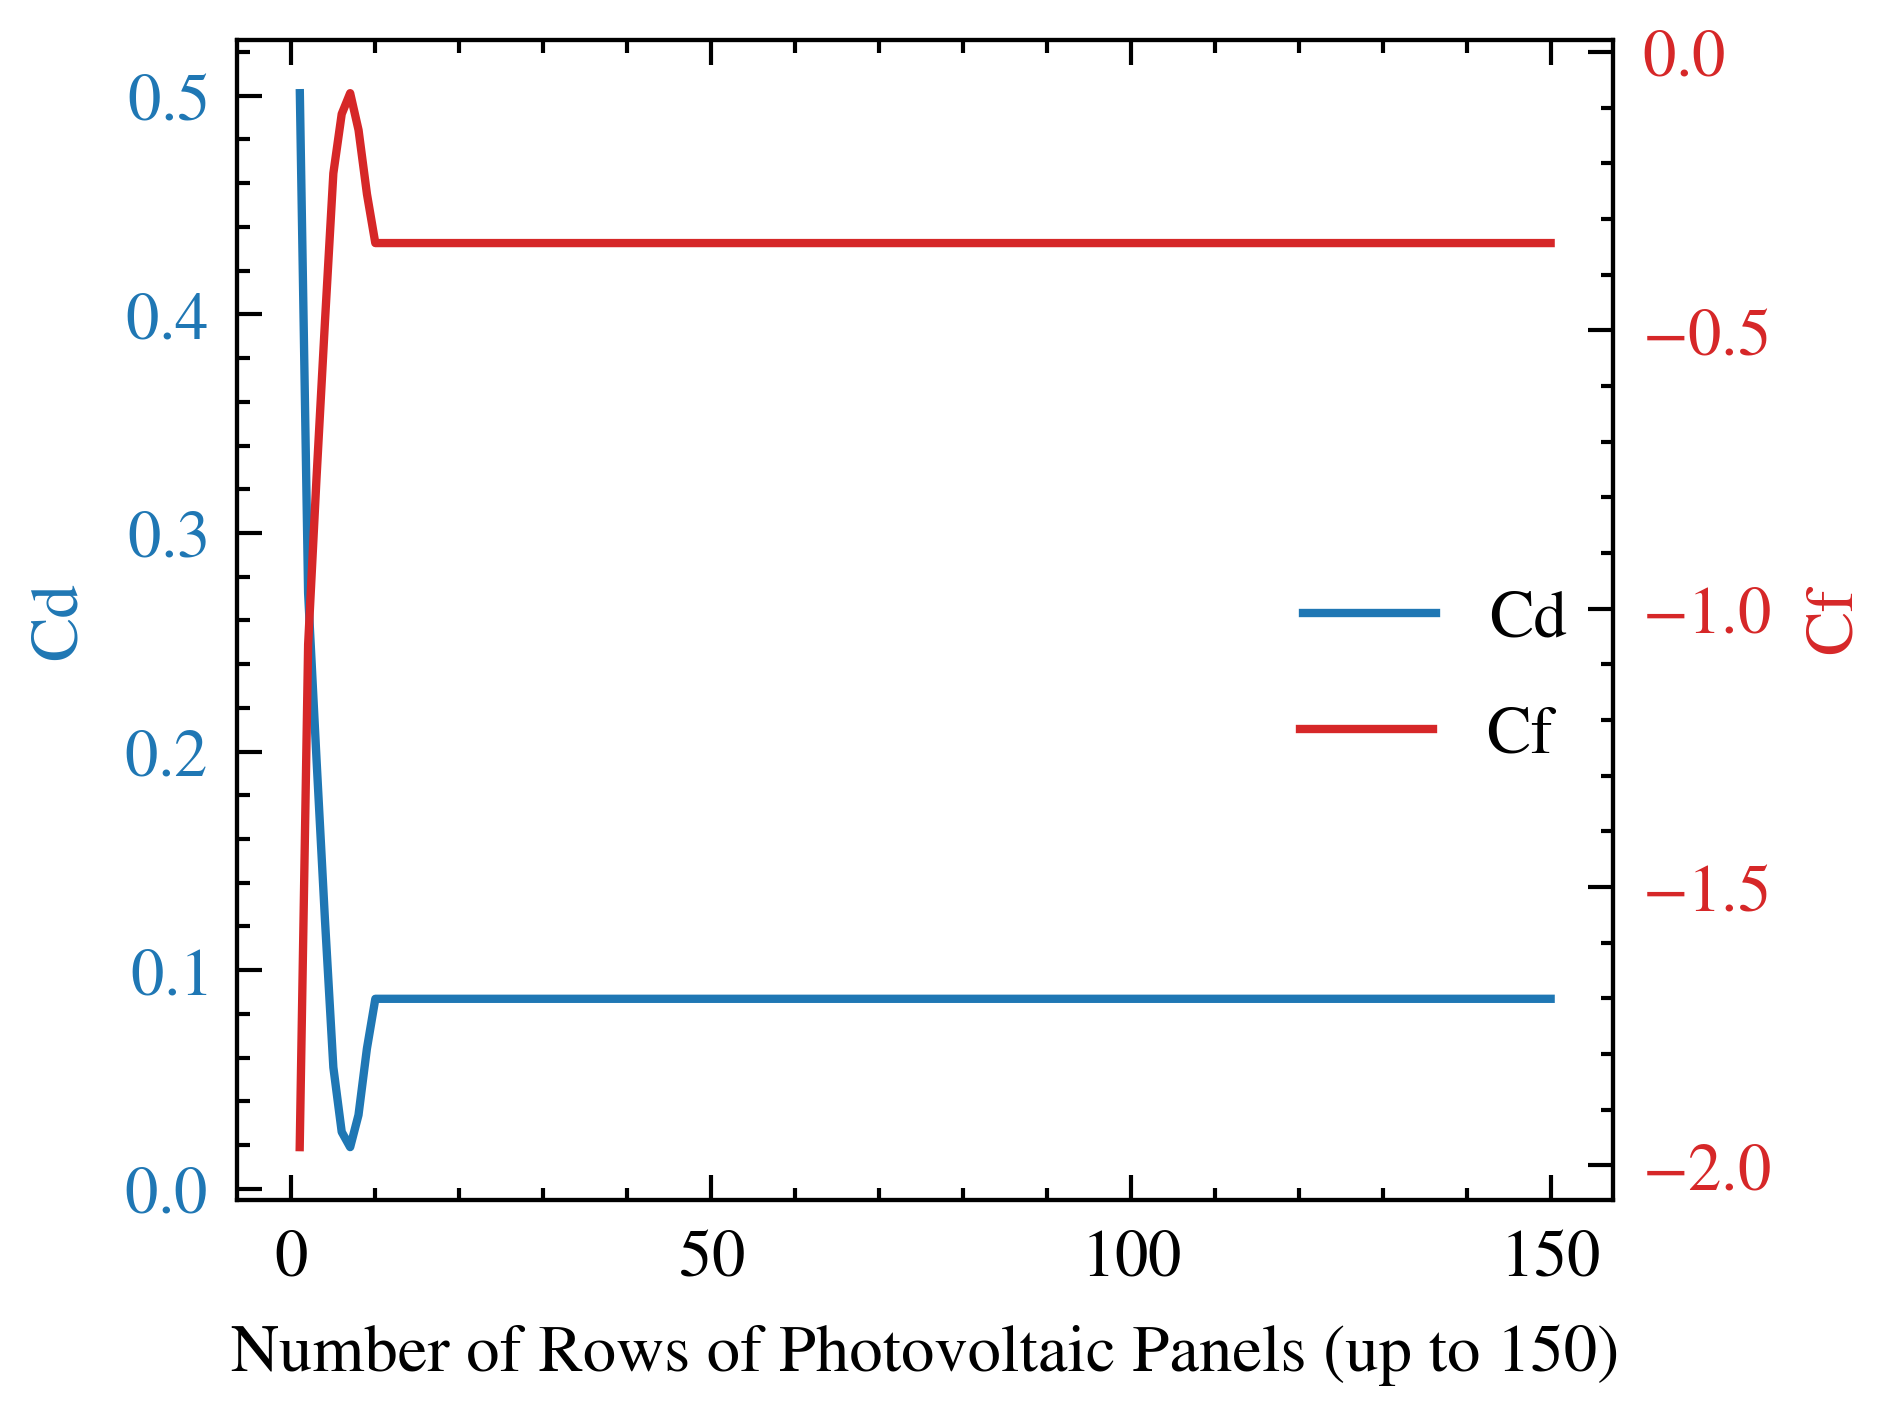

In [12]:
# 绘制风载荷系数图
import pandas as pd

# Now that we have seen the structure of the files, let's read them into pandas dataframes.
# It looks like the data is in a two-column format, with space as the separator.

def read_file_to_dataframe(file_path):
    return pd.read_csv(file_path, sep='\s+', header=None, names=['Row', 'Value'])

# Reading the data from both files
df_cd = read_file_to_dataframe('E:\phd\Code\DM-FEM2D\winddata\Ti0.1_cd_degree0.txt')
df_cf = read_file_to_dataframe("E:\phd\Code\DM-FEM2D\winddata\Ti0.1_cl_degree0.txt")

# Displaying the first few rows of each dataframe for verification
df_cd.head(), df_cf.head()

# df_cf['Value'] = df_cf['Value']*(-1)

import matplotlib.pyplot as plt

# Before plotting, we need to extend both datasets to 150 rows.
# If the datasets have less than 150 rows, we will fill the remaining rows with the last value of each dataset.

def extend_dataframe(df, max_rows):
    last_value = df['Value'].iloc[-1]
    additional_rows = max_rows - len(df)
    if additional_rows > 0:
        df = df.append([{'Row': i, 'Value': last_value} for i in range(len(df) + 1, max_rows + 1)], ignore_index=True)
    return df

# Extending both dataframes to 150 rows
df_cd_extended = extend_dataframe(df_cd, 150)
df_cf_extended = extend_dataframe(df_cf, 150)

# Plotting the data
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of Rows of Photovoltaic Panels (up to 150)')
ax1.set_ylabel('Cd', color='tab:blue')
ax1.plot(df_cd_extended['Row'], df_cd_extended['Value'], color='tab:blue', label='Cd')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='center right', bbox_to_anchor=(1.01, 0.5))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Cf', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(df_cf_extended['Row'], df_cf_extended['Value'], color='tab:red', label='Cf')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='center right', bbox_to_anchor=(1, 0.4))

fig.tight_layout()  # to ensure the right y-label is not slightly clipped
# plt.title('Cd and Cf values for Photovoltaic Panels')
plt.savefig('Cd_Cf.pdf', dpi=600, bbox_inches='tight')
plt.show()


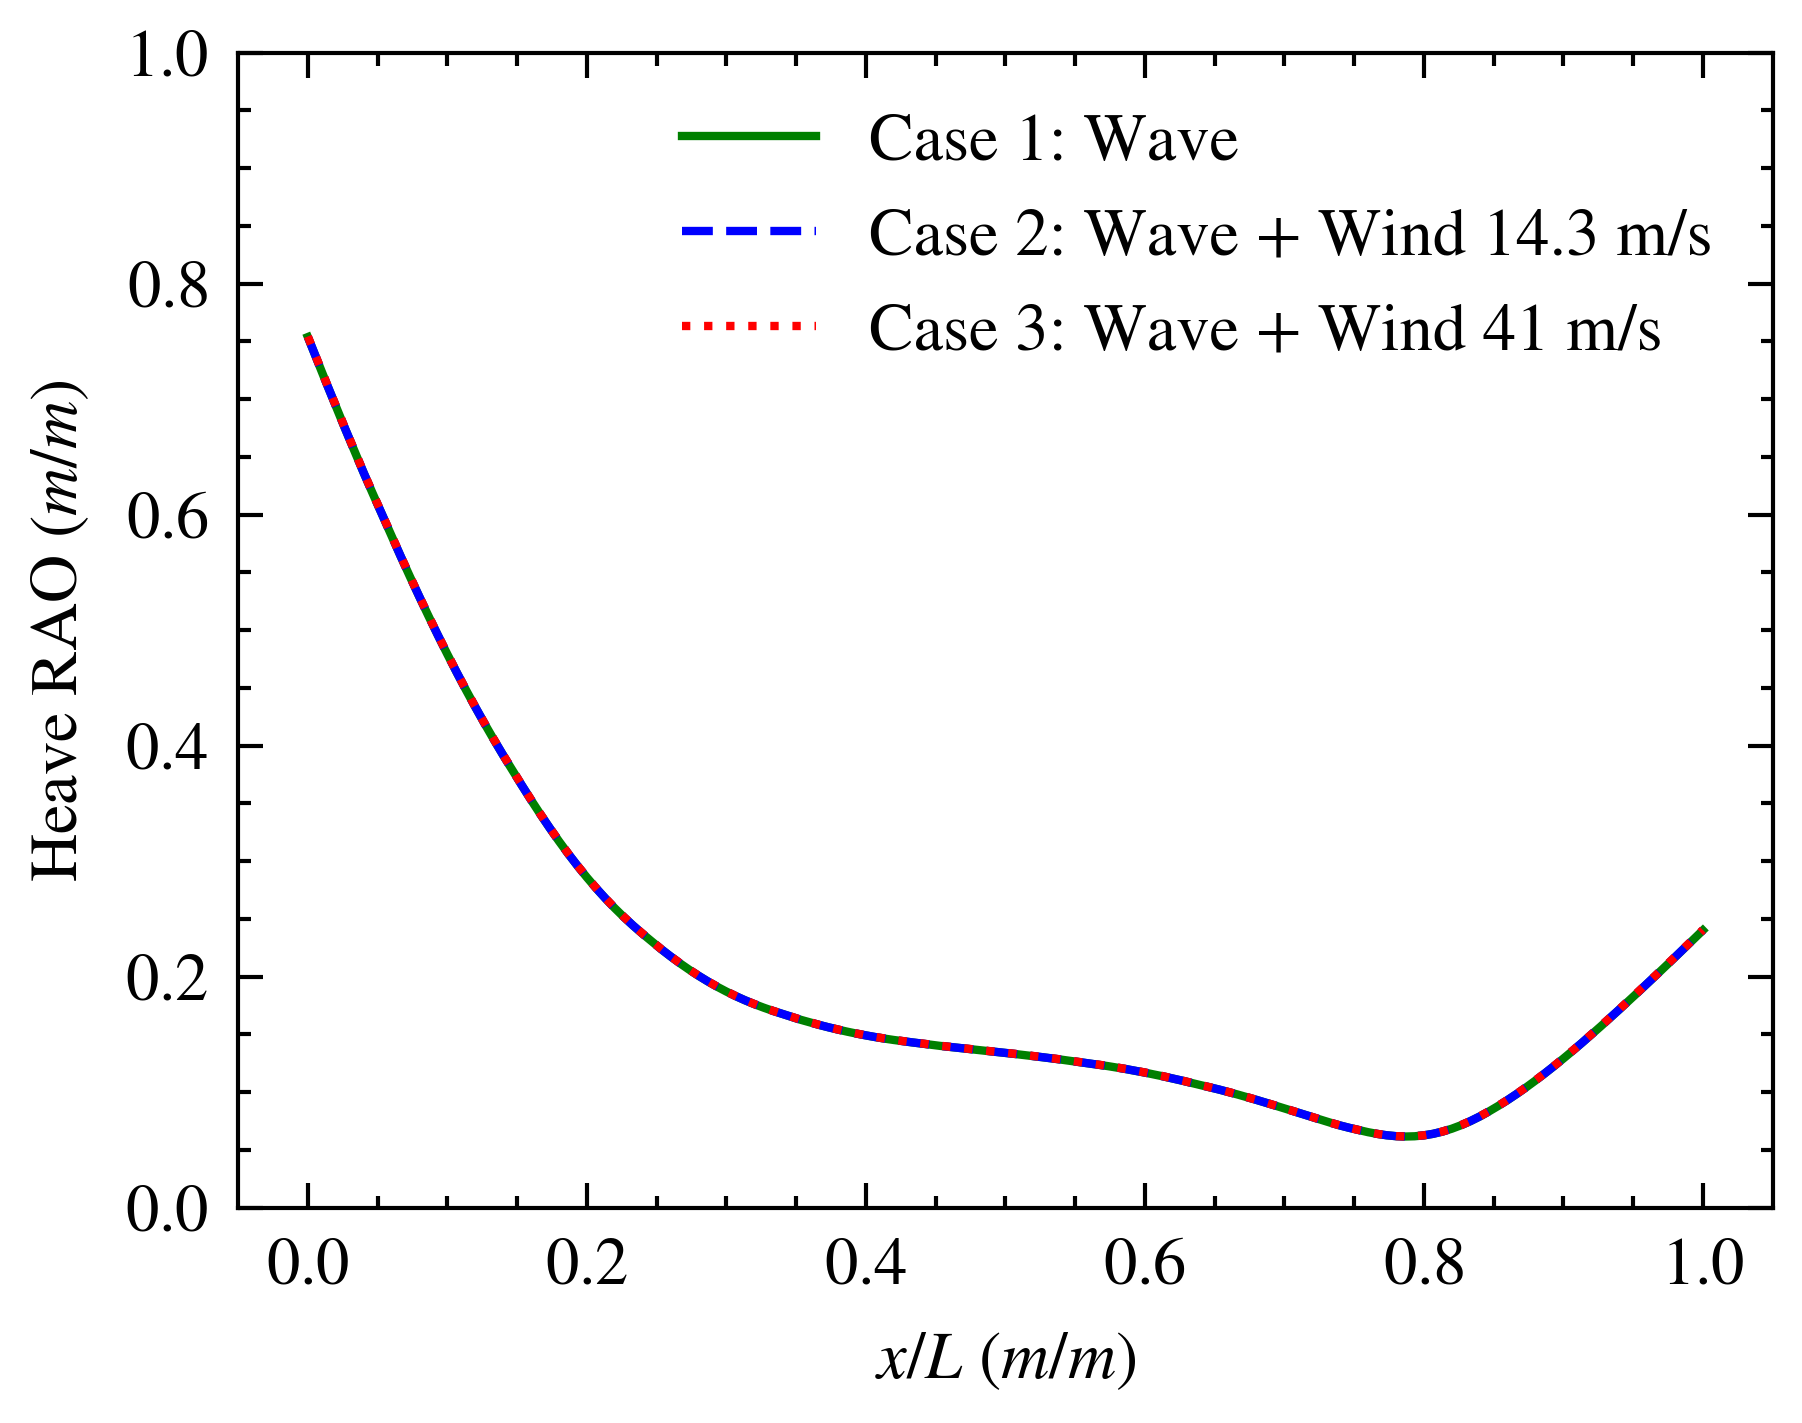

In [61]:
# 讨论5.1绘图
import pandas as pd
plt.style.use(['science','no-latex','ieee'])
# Load the data from the uploaded Excel file
file_path = 'E:\phd\Code\DM-FEM2D\winddata\垂荡响应数据5.1.xlsx'
data = pd.read_excel(file_path)

# Renaming the first column to 'Distance' for clarity
data.rename(columns={data.columns[0]: 'Distance'}, inplace=True)

# Reversing the data for columns '41.1m/s', '14.3m/s', and '0m/s'
data_reversed = data.copy()
data_reversed['41.1m/s'] = data_reversed['41.1m/s'][::-1].reset_index(drop=True)
data_reversed['14.3m/s'] = data_reversed['14.3m/s'][::-1].reset_index(drop=True)
data_reversed['0m/s'] = data_reversed['0m/s'][::-1].reset_index(drop=True)

# # Plotting the reversed data
# plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, 151)
# Plotting each wind load condition with reversed data

plt.plot(x, data_reversed['0m/s'], label='Case 1: Wave', color='green', linestyle='-')
plt.plot(x, data_reversed['14.3m/s'], label='Case 2: Wave + Wind 14.3 m/s', color='blue', linestyle='--')
plt.plot(x, data_reversed['41.1m/s'], label='Case 3: Wave + Wind 41 m/s', color='red', linestyle=':')

# Adding title and labels
# plt.title('Structure Heave Motion Response RAO at Different Wind Speeds (Reversed Data)')
plt.xlabel(r'$x/L$ $(m/m)$')
plt.ylabel(r'Heave RAO $(m/m)$')

# Adding legend
plt.legend()
plt.ylim(0, 1)
# Setting grid for better readability
# plt.grid(True)
plt.savefig('RAO51.pdf', dpi=600, bbox_inches='tight')
# Display the plot
plt.show()


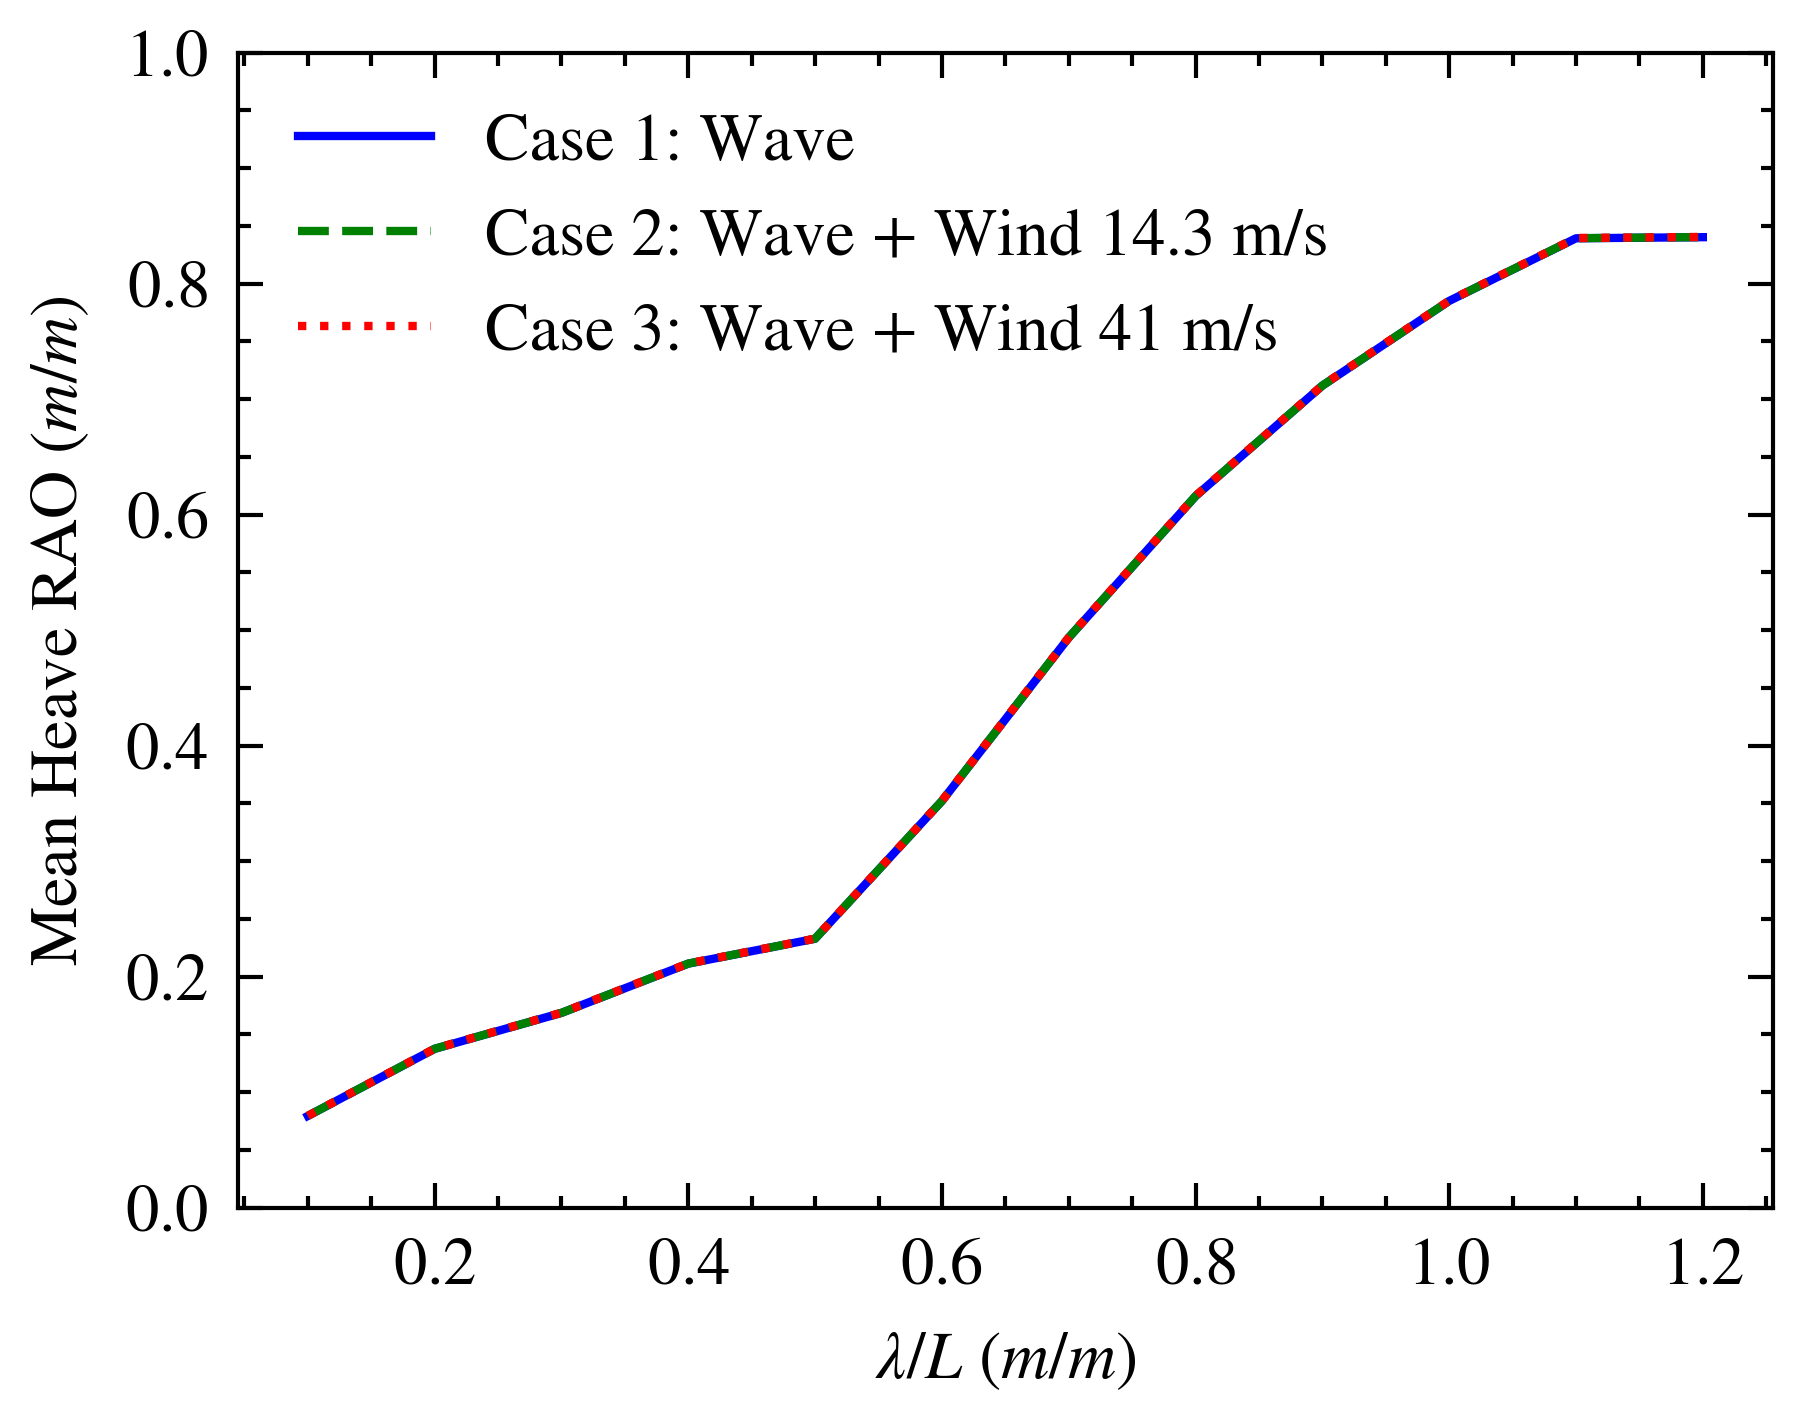

In [60]:
# Reviewing and modifying the plot generation code

# Redefining the data points just in case
wavelength_ratio = np.linspace(0.1, 1.2, 12)
case1_wave = np.array([0.079478458, 0.137580043, 0.168682365, 0.211340478, 0.232912023, 0.352155102, 0.493575394, 0.616080465, 0.711771311, 0.785122646, 0.83935947, 0.840298146])
case2_wave_wind143 = np.array([0.079517378, 0.137635005, 0.168740856, 0.211405066, 0.232954361, 0.352206694, 0.493650587, 0.616165374, 0.711857198, 0.785206402, 0.839438825, 0.840377388])
case3_wave_wind41 = np.array([0.079590447, 0.137738132, 0.168850582, 0.21152622, 0.233033765, 0.352303414, 0.493791529, 0.616324496, 0.712018136, 0.785363338, 0.839587505, 0.840525857])


plt.plot(wavelength_ratio, case1_wave, label='Case 1: Wave', color='blue', linestyle='-')
plt.plot(wavelength_ratio, case2_wave_wind143, label='Case 2: Wave + Wind 14.3 m/s', color='green', linestyle='--')
plt.plot(wavelength_ratio, case3_wave_wind41, label='Case 3: Wave + Wind 41 m/s', color='red', linestyle=':')

# plt.title('Mean Heave RAO vs. Wavelength to Structure Length Ratio')
plt.xlabel(r'$\lambda/L$ $(m/m)$')
plt.ylabel(r'Mean Heave RAO $(m/m)$')
plt.legend()
plt.ylim(0, 1)
# plt.grid(True)
plt.savefig('MeanRAO51.pdf', dpi=600, bbox_inches='tight')
plt.show()


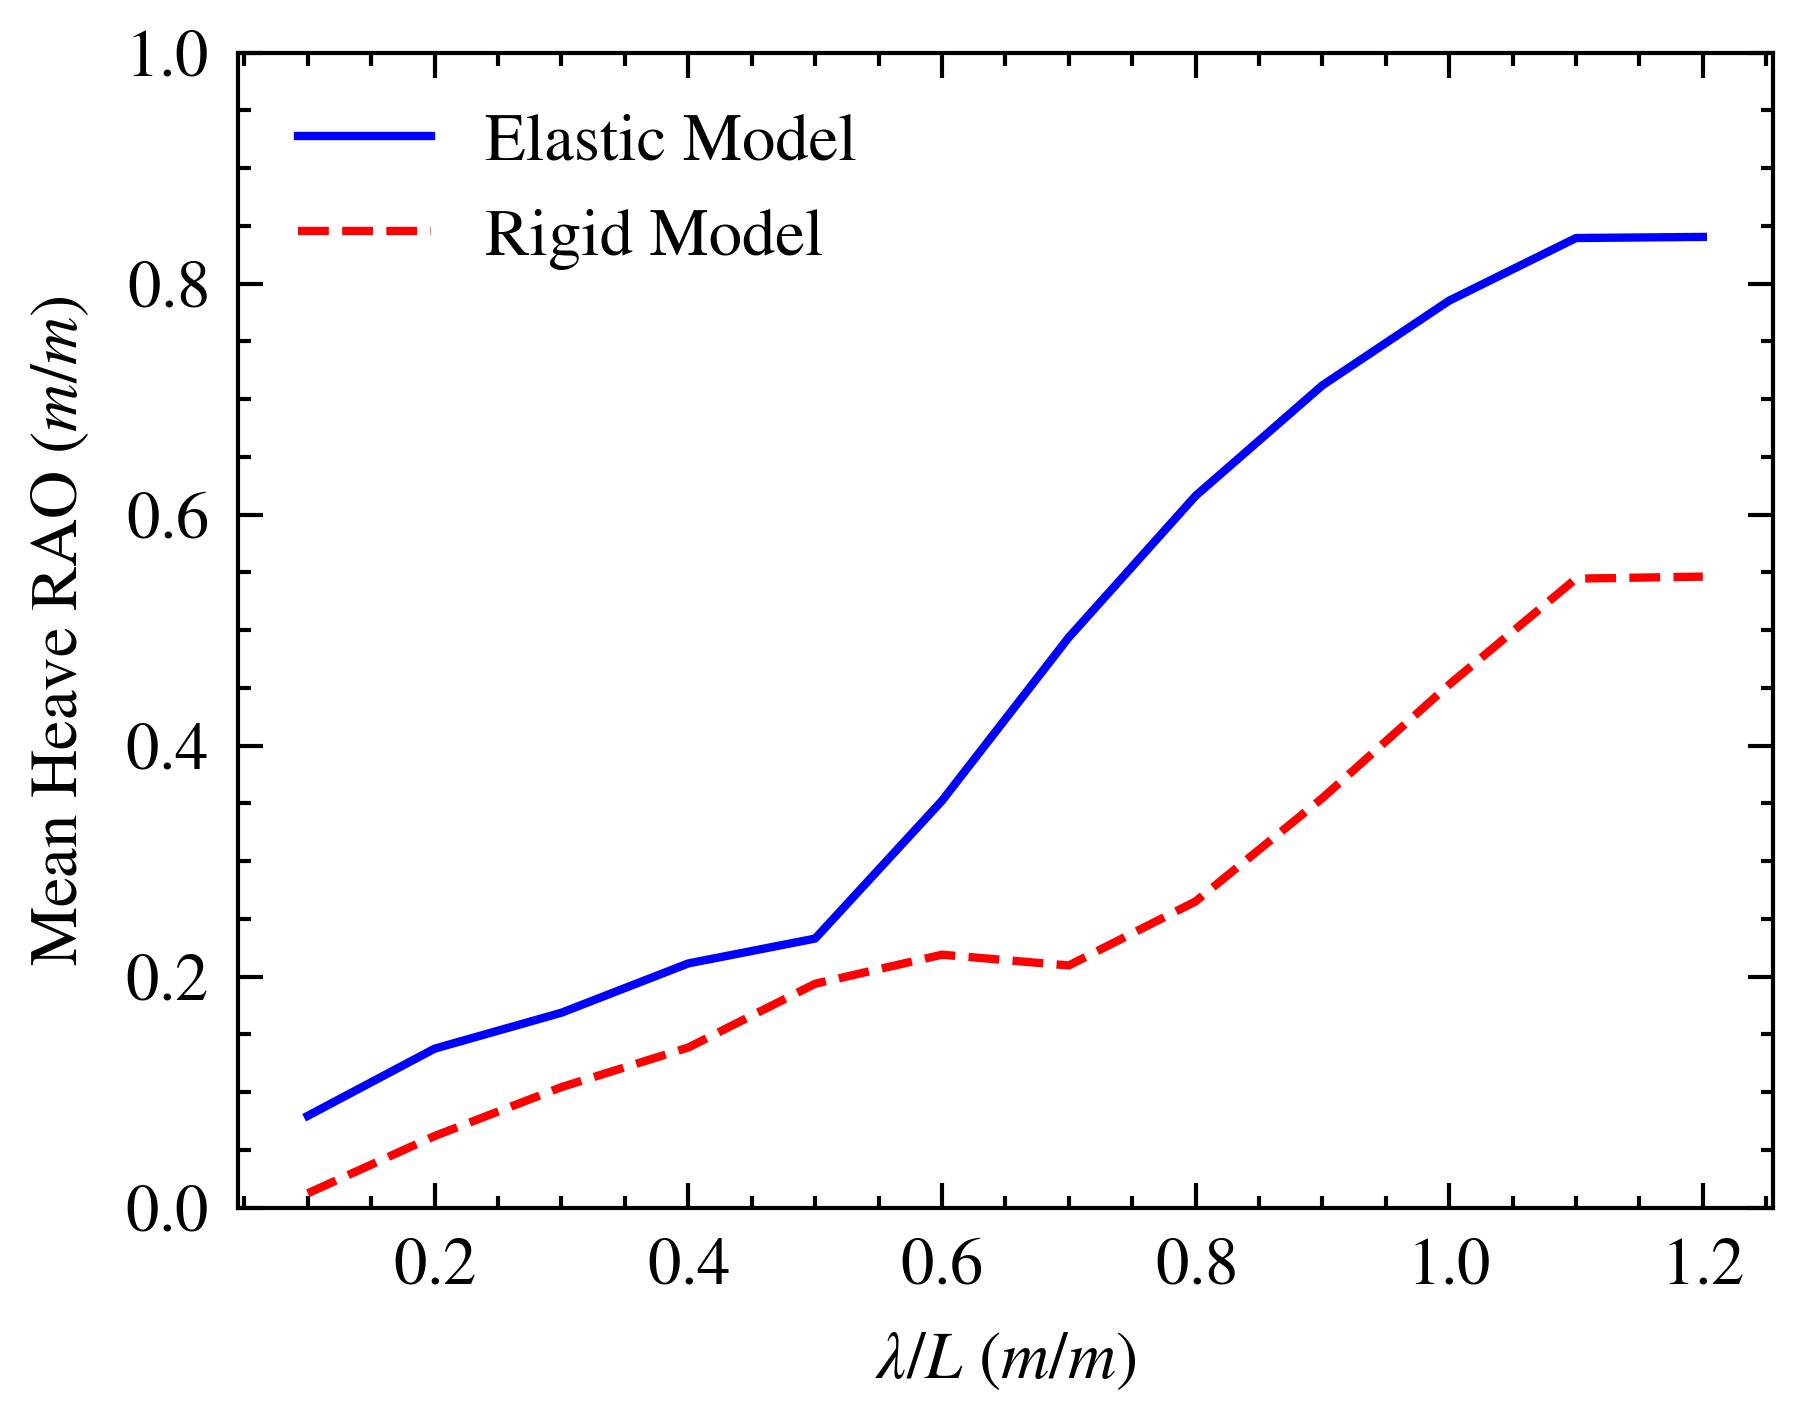

In [59]:
#绘制52b 刚柔对比图
# Attempting to create the plot again with the new data provided in the image

# Defining the data for plotting
wavelength_ratio = np.linspace(0.1, 1.2, 12)
elastic_body_model = np.array([0.079590447, 0.137738132, 0.168850582, 0.21152622, 0.233033765, 0.352303414, 0.493791529, 0.616324496, 0.712018136, 0.785363338, 0.839587505, 0.840525857])
rigid_body_model = np.array([0.01251432, 0.06209476, 0.104438557, 0.138707608, 0.193892679, 0.219069409, 0.209746914, 0.265189271, 0.354685352, 0.452928215, 0.544681167, 0.546414451])

# Creating the plot
# plt.figure(figsize=(10, 6))


plt.plot(wavelength_ratio, elastic_body_model, label='Elastic Model', color='blue', linestyle='-')
plt.plot(wavelength_ratio, rigid_body_model, label='Rigid Model', color='red', linestyle='--')

# plt.title('Mean Heave RAO vs. Wavelength to Structure Length Ratio')
plt.xlabel(r'$\lambda/L$ $(m/m)$')
plt.ylabel(r'Mean Heave RAO $(m/m)$')
plt.legend()
plt.ylim(0, 1)
# plt.grid(True)
plt.savefig('MeanRAO52.pdf', dpi=600, bbox_inches='tight')
# Attempting to display the plot
plt.show()


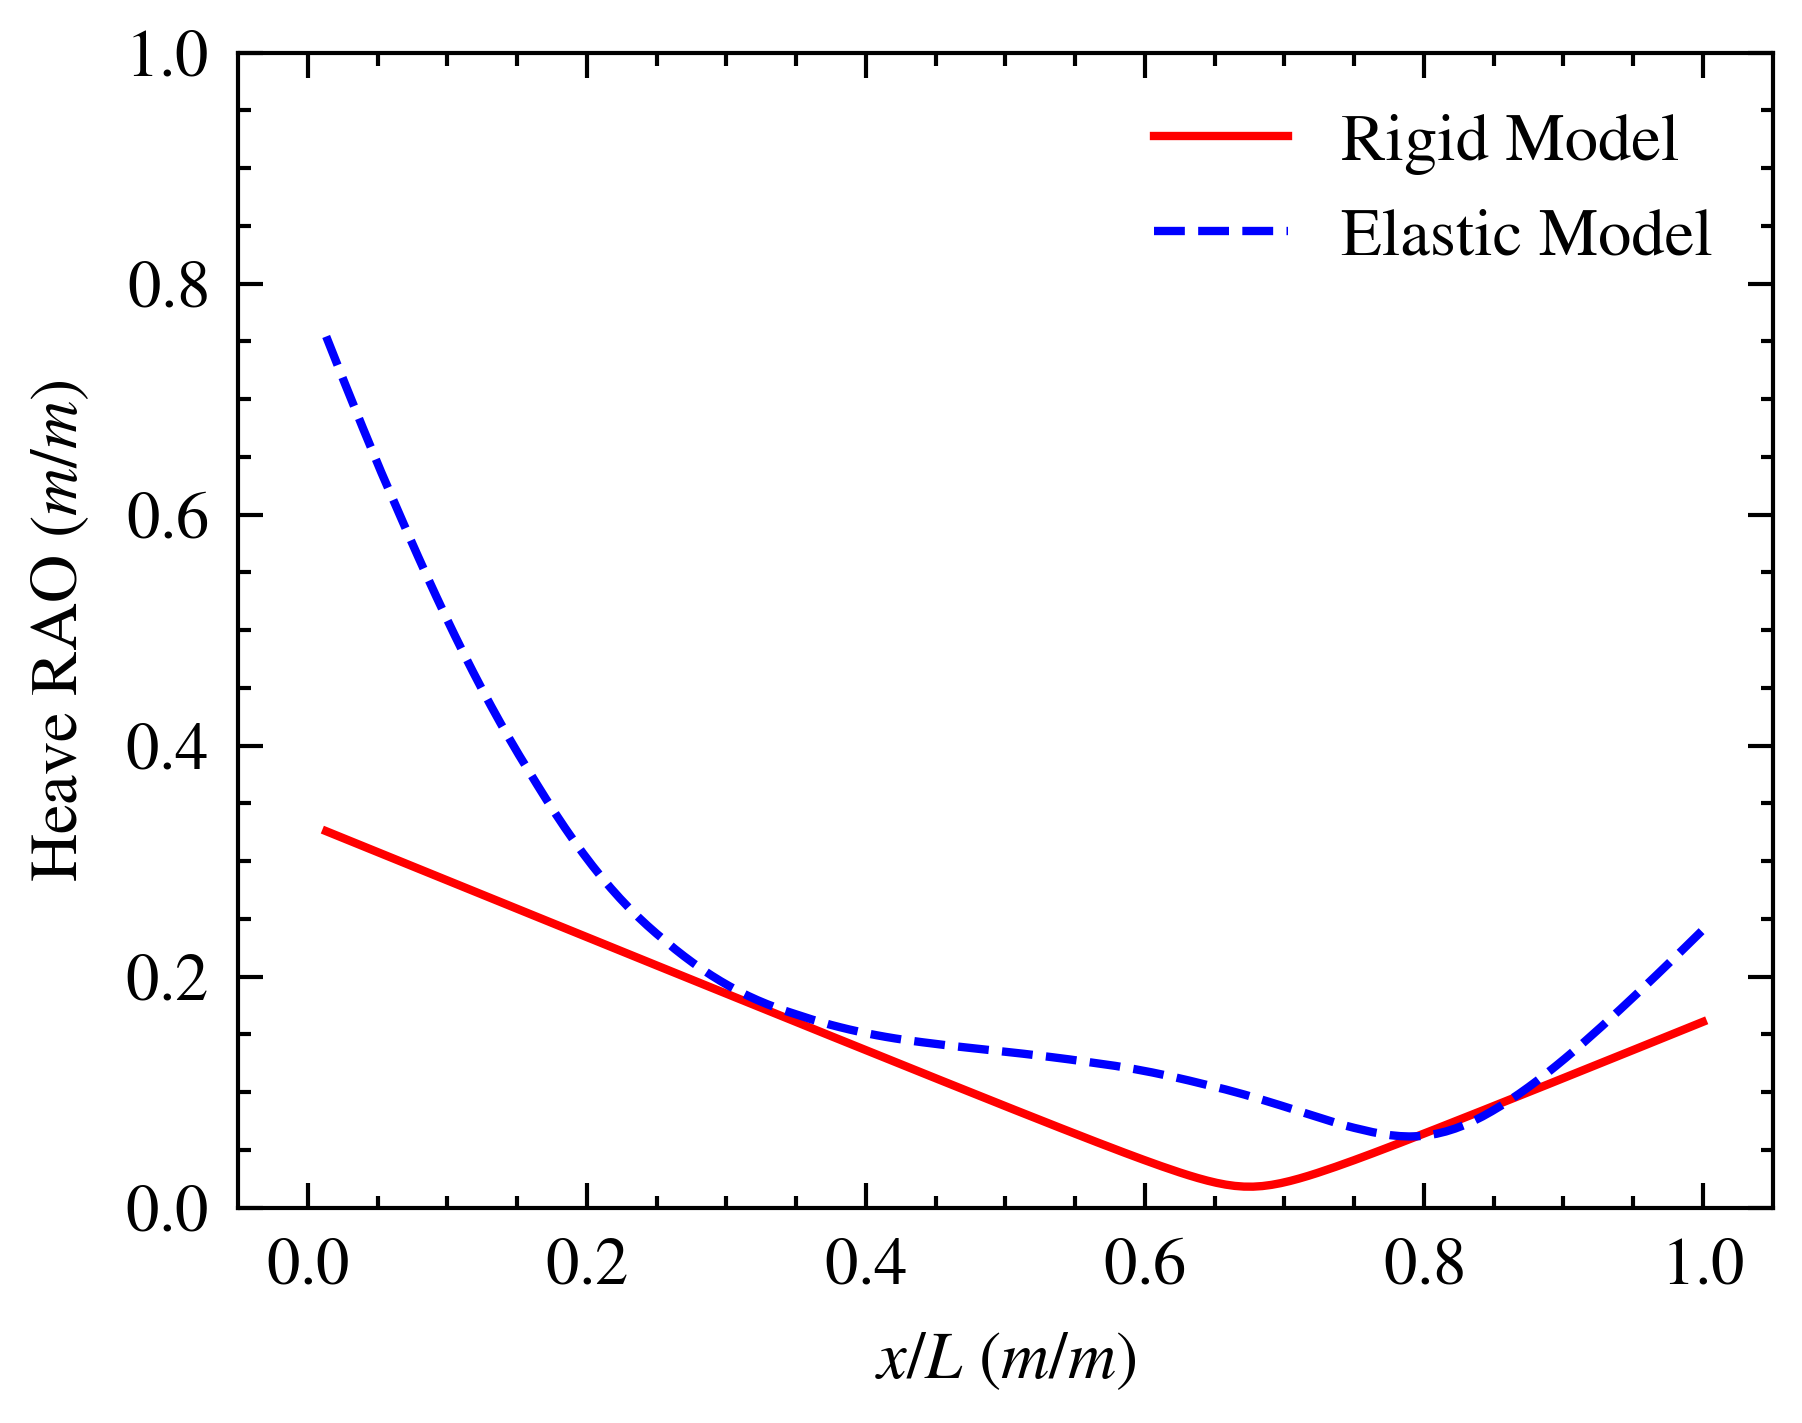

In [5]:
import pandas as pd
# import matplotlib.pyplot as plt

# Load the data from your local Excel file
file_path = 'E:\phd\Code\DM-FEM2D\winddata\讨论52a.xlsx'  # Make sure to update this path
data = pd.read_excel(file_path)

# # Plotting the data
# Reverse the DataFrame rows
reversed_data = data.iloc[::-1].reset_index(drop=True)
# plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, 153)
# Plotting 'Elastic Body' data
plt.plot(x, reversed_data.iloc[:, 1], label='Rigid Model', color='red', linestyle='-')

# Plotting 'Rigid Body' data
plt.plot(x, reversed_data.iloc[:, 2], label='Elastic Model', color='blue', linestyle='--')

# Adding title and labels
# plt.title('Heave Response RAO vs. Central Axis Length')
plt.xlabel(r'$x/L$ $(m/m)$')
plt.ylabel(r'Heave RAO $(m/m)$')
plt.ylim(0, 1.0)
# Adding legend
plt.legend()
plt.savefig('RAO52a.pdf', dpi=600, bbox_inches='tight')
# Display the plot
plt.show()


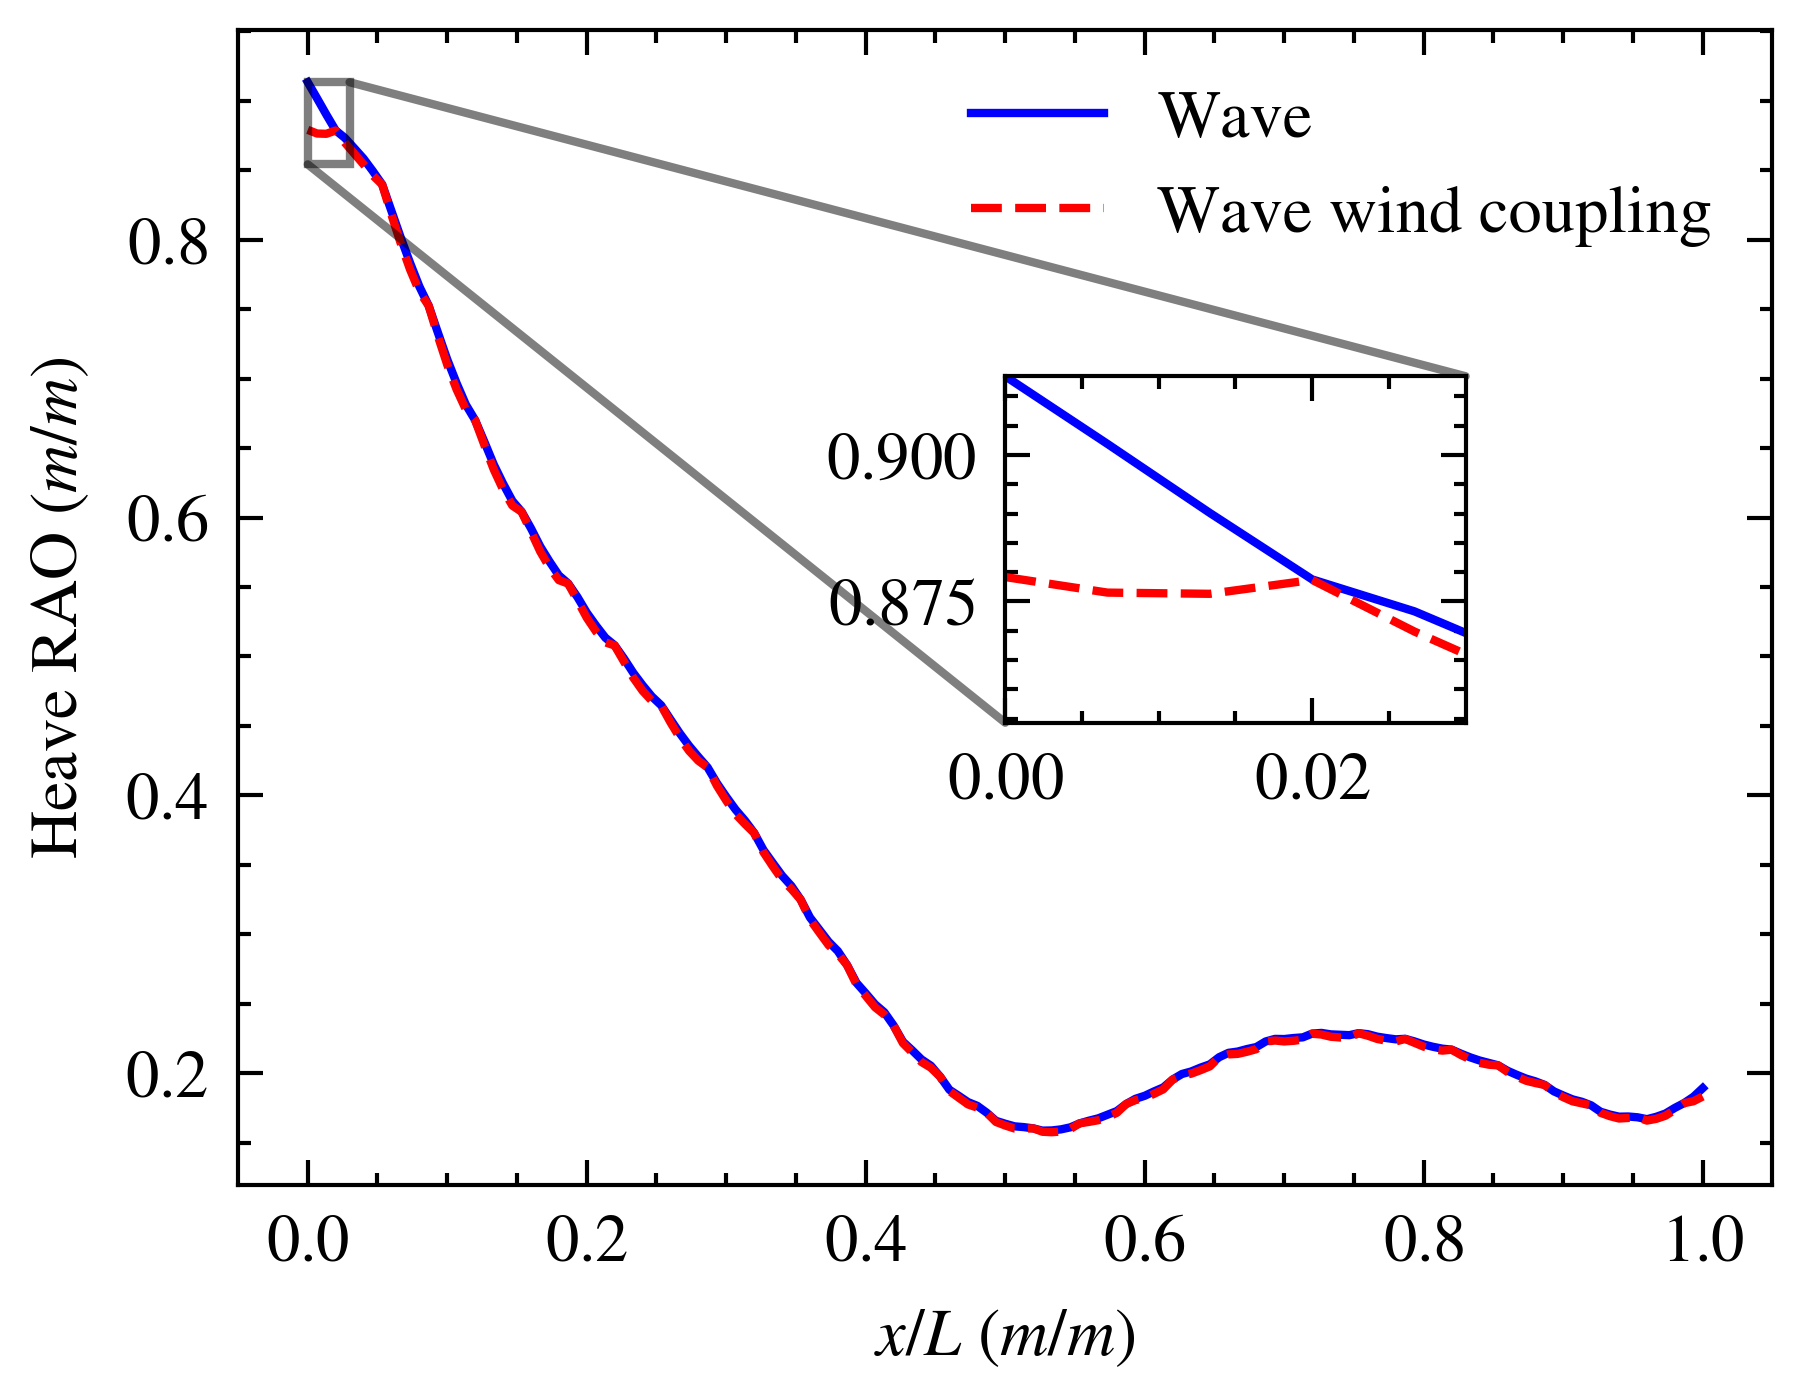

In [97]:
# Attempting to read the Excel file, normalize the 'Distance' column to (0,1), reverse the second and third columns, and create a plot with a more zoomed-in inset.
try:
    # Reading the provided Excel file
    data = pd.read_excel('E:\phd\Code\DM-FEM2D\winddata\讨论53a.xlsx')
    
    # Normalize the 'Distance' column to (0,1)
    data[data.columns[0]] = (data[data.columns[0]] - data[data.columns[0]].min()) / (data[data.columns[0]].max() - data[data.columns[0]].min())
    
    # Reverse the second and third columns (Elastic Body and Rigid Body data)
    data[data.columns[1]] = data[data.columns[1]][::-1].reset_index(drop=True)
    data[data.columns[2]] = data[data.columns[2]][::-1].reset_index(drop=True)

    # Main plot creation
    fig, ax_main = plt.subplots()

    # Main plot with normalized x-axis and reversed column data
    ax_main.plot(data.iloc[:, 0], data.iloc[:, 1], label='Wave', color='blue', linestyle='-')
    ax_main.plot(data.iloc[:, 0], data.iloc[:, 2], label='Wave wind coupling', color='red', linestyle='--')
    # ax_main.set_title('Normalized Heave Response RAO vs. Central Axis Length')
    ax_main.set_xlabel(r'$x/L$ $(m/m)$')
    ax_main.set_ylabel(r'Heave RAO $(m/m)$')
    # ax_main.get_ylim(0, 0.8)
    ax_main.legend()
    # ax_main.grid(True)

    # Inset plot creation to show a further zoomed area at the start of the curves
    inset_ax = ax_main.inset_axes([0.5, 0.4, 0.3, 0.3])  # Inset position and size
    inset_ax.plot(data.iloc[:int(0.05 * len(data)), 0], data.iloc[:int(0.05 * len(data)), 1], color='blue', linestyle='-')
    inset_ax.plot(data.iloc[:int(0.05 * len(data)), 0], data.iloc[:int(0.05 * len(data)), 2], color='red', linestyle='--')

    # Set the x limits of the inset to the first 5% of the normalized x-axis data
    inset_ax.set_xlim(0, 0.03)
    # Set the y limits to the range within the first 5% of the data
    y_min = min(data.iloc[:int(0.05 * len(data)), 1:].min())
    y_max = max(data.iloc[:int(0.05 * len(data)), 1:].max())
    inset_ax.set_ylim(y_min, y_max)
    # inset_ax.grid(True)

    # Connect the inset plot with the main plot to show the zoomed area
    ax_main.indicate_inset_zoom(inset_ax, edgecolor="black")
    plt.savefig('RAO53a.pdf', dpi=600, bbox_inches='tight')
    # Show the final plot with both the main and inset plots
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


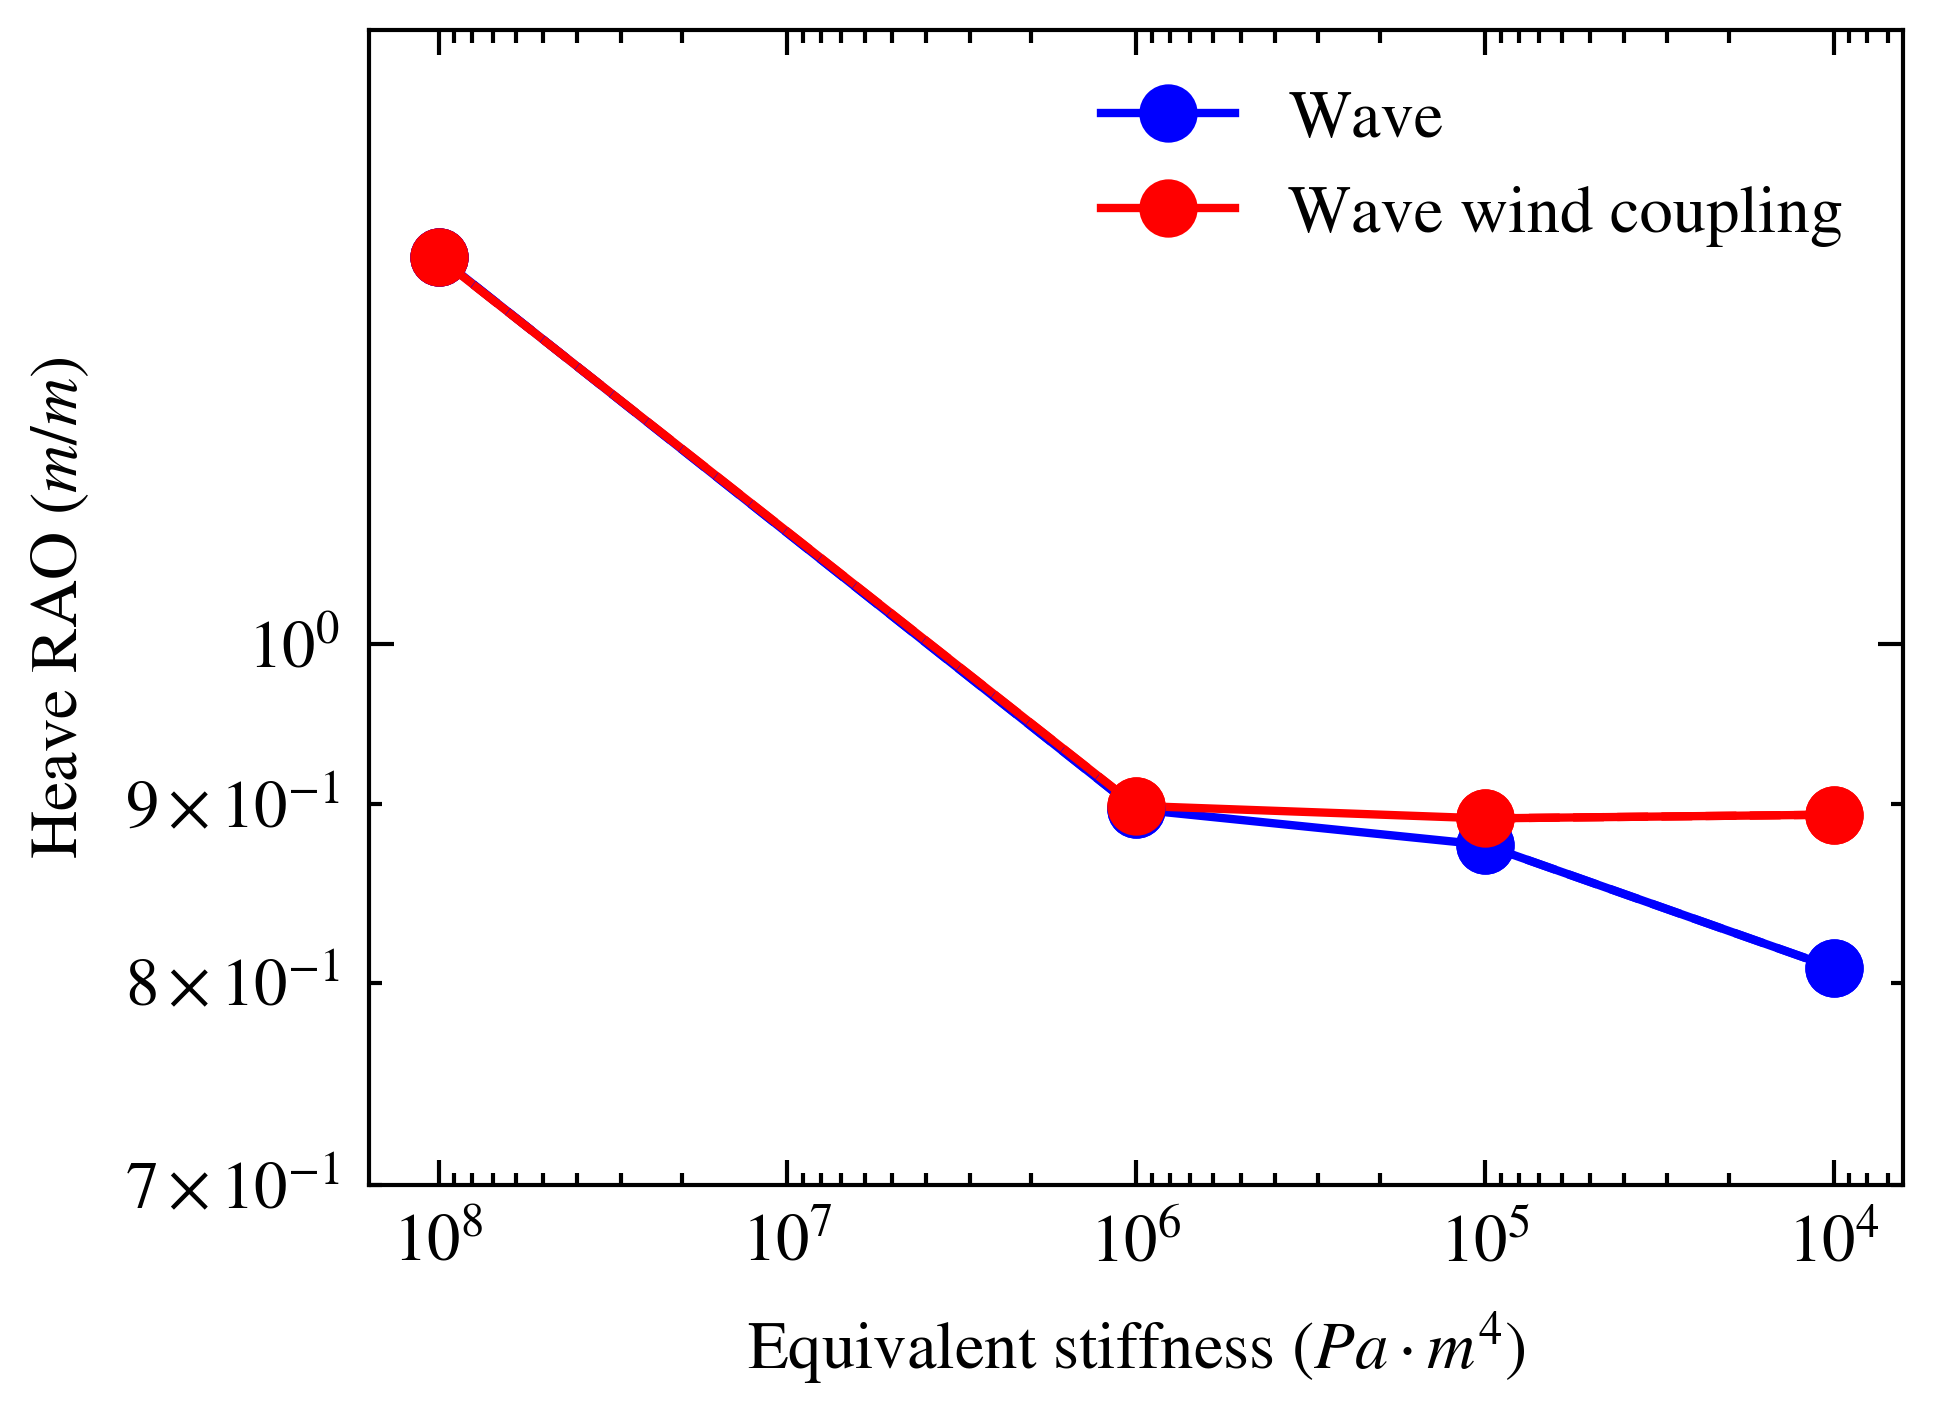

In [112]:
import numpy as np

# 数据
stiffnesses = np.array([1.00e+08, 1.00e+06, 1.00e+05, 1.00e+04])
displacements_with_wind = np.array([1.291567589, 0.896916675, 0.876108374, 0.807776989])
displacements_without_wind = np.array([1.290951058, 0.898955107, 0.891502908, 0.893713533])

# 绘图
# plt.figure(figsize=(10, 6))
plt.loglog(stiffnesses, displacements_with_wind, 'o-', label='Wave', color='blue')
plt.loglog(stiffnesses, displacements_without_wind, 'o-', label='Wave wind coupling', color='red')

# 添加虚线趋势
plt.loglog(stiffnesses[:2], displacements_with_wind[:2], 'o--', color='blue')
plt.loglog(stiffnesses[-2:], displacements_with_wind[-2:], 'o--', color='blue')
plt.loglog(stiffnesses[:2], displacements_without_wind[:2], 'o--', color='red')
plt.loglog(stiffnesses[-2:], displacements_without_wind[-2:], 'o--', color='red')

plt.xlabel(r'Equivalent stiffness $(Pa \cdot m^4)$')
plt.ylabel(r'Heave RAO $(m/m)$')
# plt.title('Impact of Wind Load on Structural Displacement')
plt.legend()
plt.ylim(0.7, 1.5)
plt.gca().invert_xaxis()  # 反转x轴
plt.savefig('RAO53b.pdf', dpi=600, bbox_inches='tight')
plt.show()


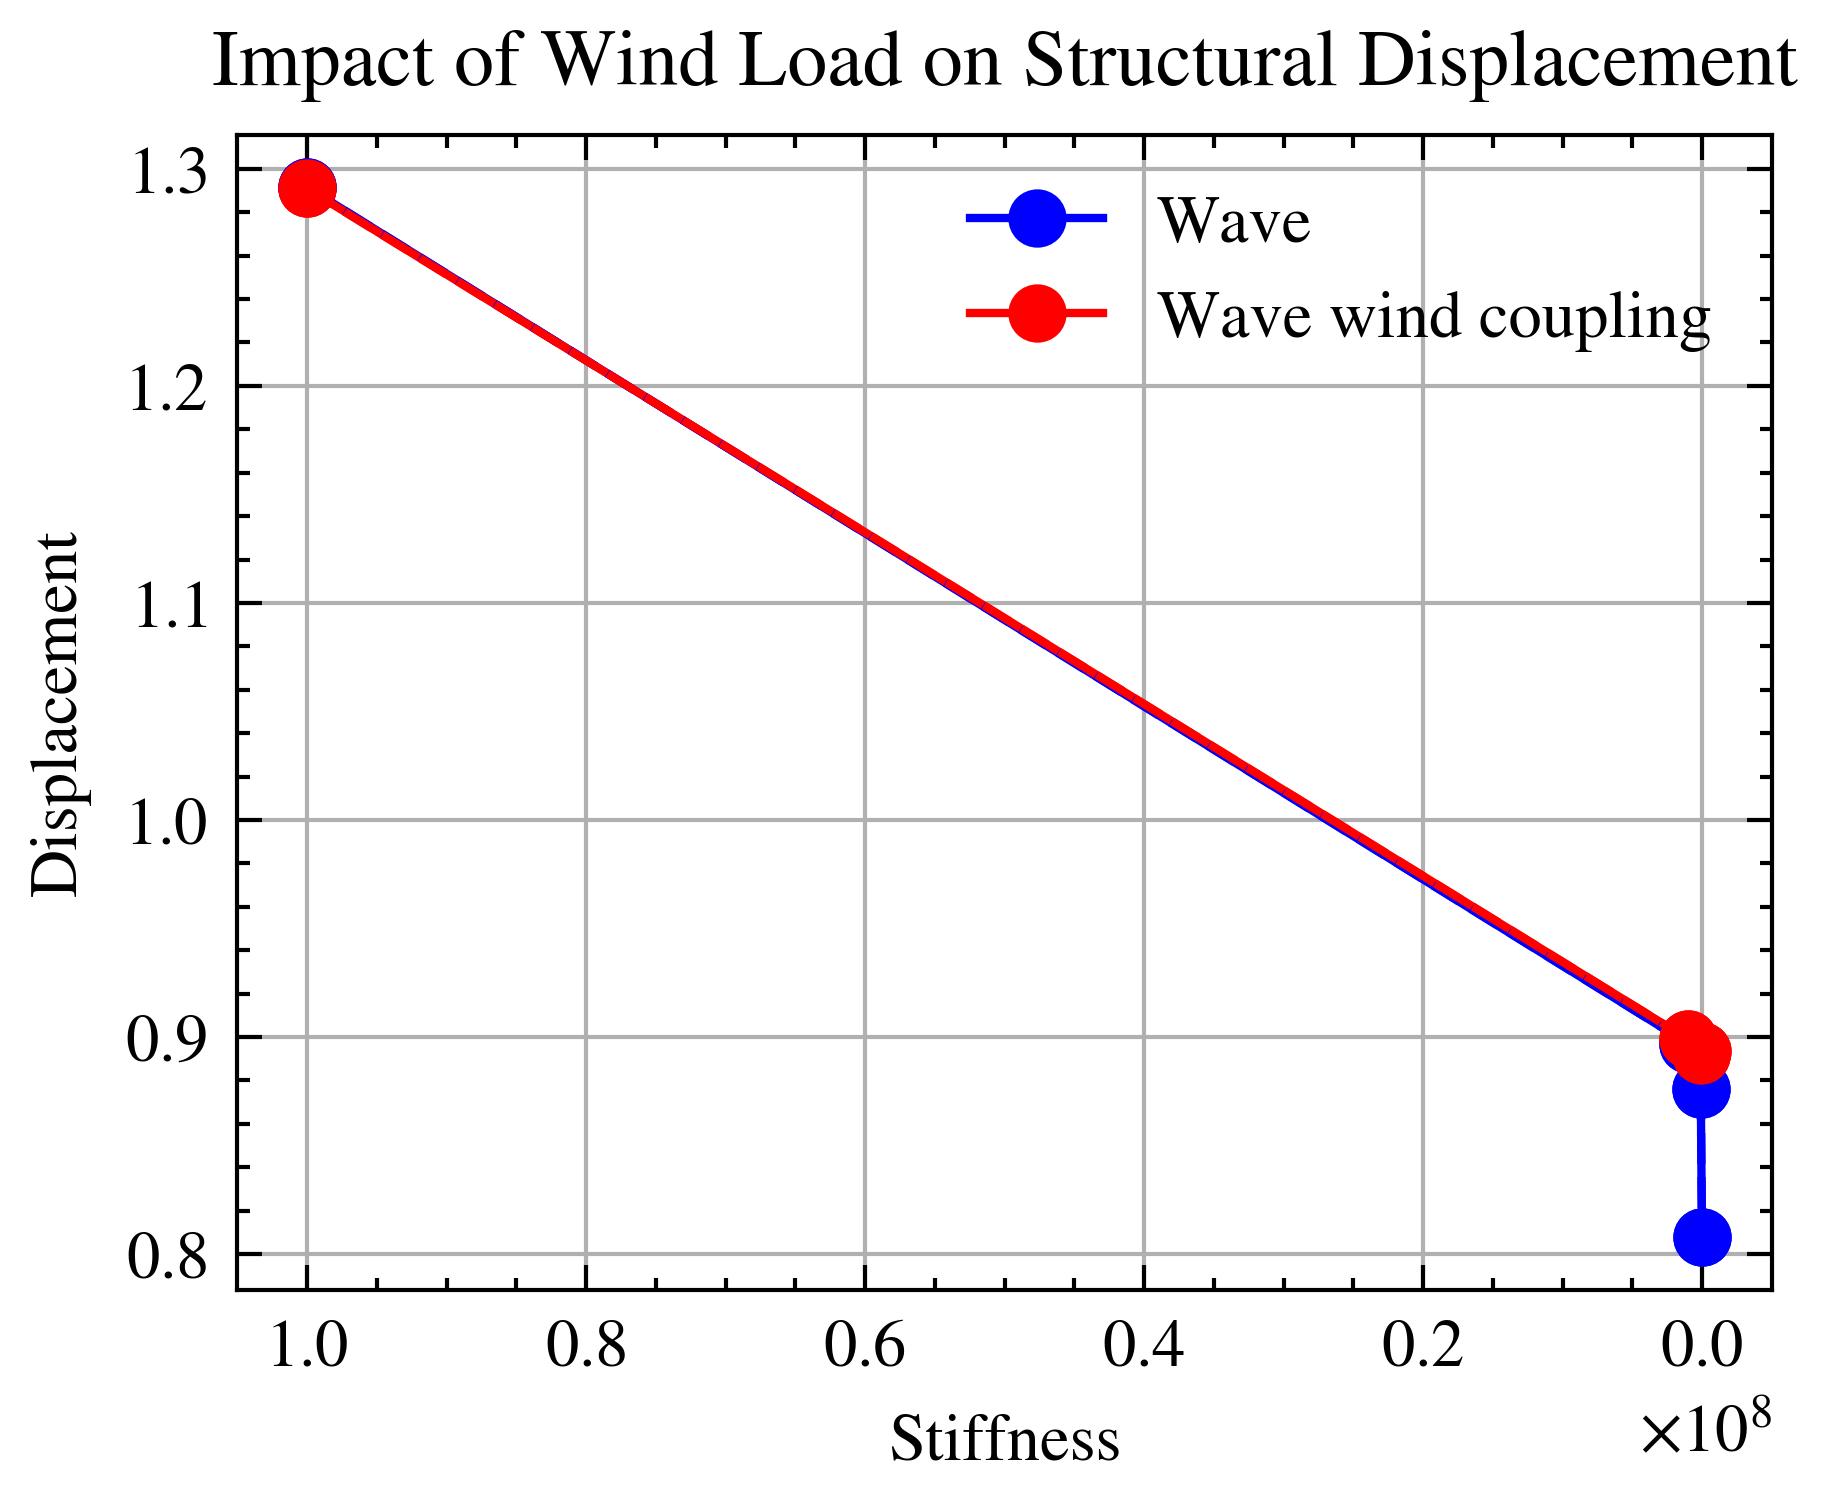

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Data
stiffnesses = np.array([1.00e+08, 1.00e+06, 1.00e+05, 1.00e+04])
displacements_with_wind = np.array([1.291567589, 0.896916675, 0.876108374, 0.807776989])
displacements_without_wind = np.array([1.290951058, 0.898955107, 0.891502908, 0.893713533])

# Normal plot (not log-log)
# plt.figure(figsize=(10, 6))
plt.plot(stiffnesses, displacements_with_wind, 'o-', label='Wave', color='blue')
plt.plot(stiffnesses, displacements_without_wind, 'o-', label='Wave wind coupling', color='red')

# Adding dashed line trend
plt.plot(stiffnesses[:2], displacements_with_wind[:2], 'o--', color='blue')
plt.plot(stiffnesses[-2:], displacements_with_wind[-2:], 'o--', color='blue')
plt.plot(stiffnesses[:2], displacements_without_wind[:2], 'o--', color='red')
plt.plot(stiffnesses[-2:], displacements_without_wind[-2:], 'o--', color='red')

plt.xlabel('Stiffness')
plt.ylabel('Displacement')
plt.title('Impact of Wind Load on Structural Displacement')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Invert x-axis
plt.show()
